# 경기도 제공 기본데이터
- 연령대 조사중으로 인해 1 row 제거

In [283]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import json
import csv
import sys

pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_seq_items',None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)
plt.rc('font', family='Malgun Gothic')

In [284]:
covid_file_name = 'files/covid_gyeonggido_0924.csv'
covid_df = pd.read_csv(covid_file_name)

In [285]:
covid_df.columns

Index(['기준일(발병일, 확진일 선택)', '지역 + 시 ', '필터(무증상,조사중 제외)', 'GRP', '감염경로', '경기번호',
       '구분', '구분2', '나이(만)', '무증상/조사중', '무증상/조사중 기준일', '성별', '연령대', '연령대별 비율',
       '연번', '재검출', '증상발현일', '지역', '지역 (group)', '필터(무증상,조사중 제외)(복사본)',
       '확진일-증상발현일', '확진일-증상발현일_무증상조사중포함', '확진일자', '확진자', '레코드 수', '무증상자수',
       '최종_무증상자수'],
      dtype='object')

In [286]:
covid_df.head()

,"기준일(발병일, 확진일 선택)",지역 + 시,"필터(무증상,조사중 제외)",GRP,감염경로,경기번호,구분,구분2,나이(만),무증상/조사중,무증상/조사중 기준일,성별,연령대,연령대별 비율,연번,재검출,증상발현일,지역,지역 (group),"필터(무증상,조사중 제외)(복사본)",확진일-증상발현일,확진일-증상발현일_무증상조사중포함,확진일자,확진자,레코드 수,무증상자수,최종_무증상자수
0,2020. 3. 13.,안양시,참,grp42,서울_콜센터,안양-13,접촉자,,1,,2020. 3. 13.,M,0,0대,195,,2020. 3. 13.,안양만안,안양,참,0,0일,2020. 3. 13.,8033,1,0,0
1,2020. 3. 16.,부천시,참,grp42,서울_콜센터,부천-38,접촉자,,9,,2020. 3. 16.,M,0,0대,232,,2020. 3. 14.,부천,부천,참,2,2일,2020. 3. 16.,8276,1,0,0
2,2020. 3. 18.,용인시,참,grp79,해외유입,용인-22,접촉자,,1,무증상,2020. 3. 18.,F,0,0대,279,,NaN,용인수지,용인,참,-,무증상,2020. 3. 18.,8610,1,1,1
3,2020. 3. 18.,화성시,참,grp16,과천_신천지,화성-13,접촉자,,5,,2020. 3. 18.,M,0,0대,282,,2020. 3. 9.,화성,화성,참,9,9일,2020. 3. 18.,8541,1,0,0
4,2020. 3. 21.,부천시,참,grp53,대구경북_일반,부천-48,접촉자,,0,무증상,2020. 3. 21.,M,0,0대,331,,NaN,부천,부천,참,-,무증상,2020. 3. 21.,8823,1,1,1


In [287]:
def draw_covid_df_countplot(x:str, df):
    plt.figure(figsize=(20,10))
    sns.countplot(x=x,  data=df)

In [288]:
del covid_df['연번']
del covid_df['확진자']
del covid_df['무증상/조사중']
del covid_df['경기번호']
del covid_df['감염경로']
del covid_df['GRP']
del covid_df['구분2']
del covid_df['구분']
del covid_df['기준일(발병일, 확진일 선택)']
del covid_df['무증상/조사중 기준일']

# 8월부터 후유증 기사가 증가하였음


## 부산 47번환자 기준

> 원본글 8월16일 이슈
>
> https://www.facebook.com/Busan47  
>
> 부산 47번환자 8월 16일 글 좋아요 1600 공유 1300 
>
### 뉴스화
>
> https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=081&aid=0003116790&fbclid=IwAR1iCzfDoq_MKDWPGA_Fw-ZD52JnbaXAx0XG27iOWrC2gQEqFey3uHZKC7o


In [289]:
before_affect = covid_df[covid_df['증상발현일'] < '2020. 8. 01']
after_affect = covid_df[covid_df['증상발현일'] > '2020. 8. 01']

### 8월1일 이전 연령별 감염자수 

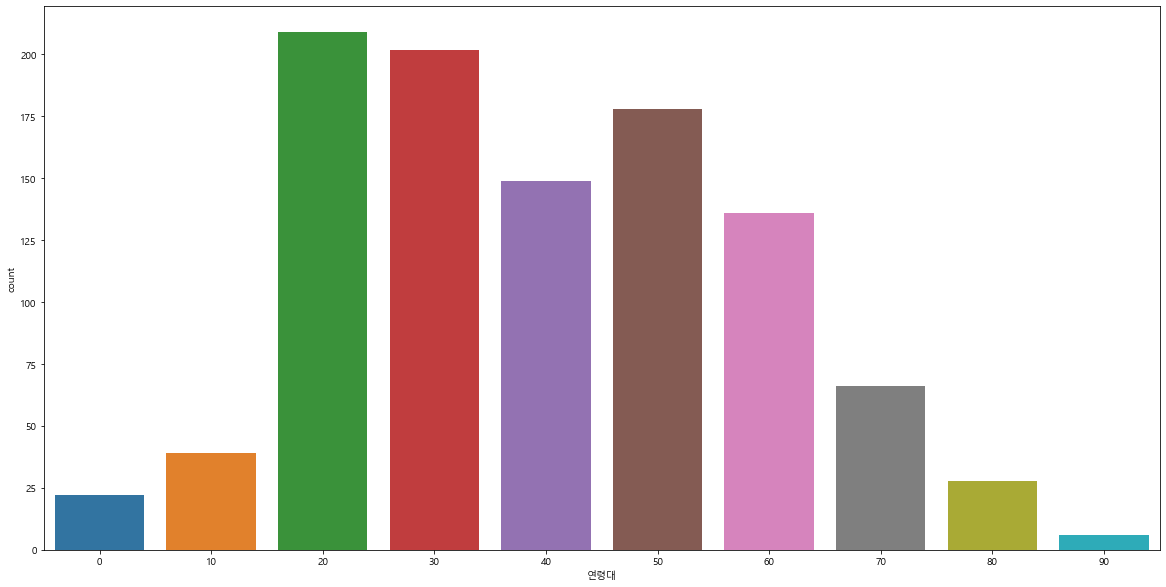

In [291]:
draw_covid_df_countplot('연령대',before_affect)

### 8월1일 이후 연령별 감염자수 

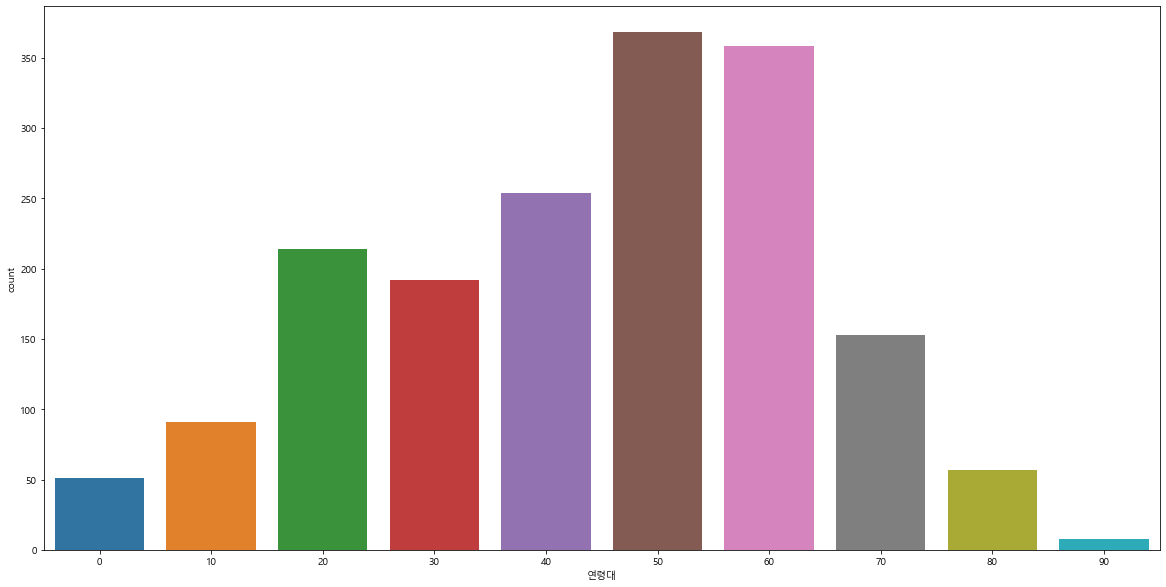

In [292]:
draw_covid_df_countplot('연령대',after_affect)

### 사회적 거리두기(정부의 시행)
|기간|내용|점수|
|------|:---|---|
|01.15 ~ 03.21| 특별한 조치 없음 |   0  |
|03.22 ~ 04.19| 정부, 종교 실내체육 유흥시설 운영중단 강력권고|   1  |
|04.20 ~ 05.05| 완화된 사회적 거리두기|2|
|05.06 ~ 08.15| 생활 속 거리두기|3|
|08.16 ~ 08.22| 2단계, 서울 경기 인천지역 사회적 거리두기 조치|4|
|08.23 ~ 09.03| 2단계 전국 확산|4|
|09.04 ~ 09.13| 2.5단계, 수도권 사회적 거리두기| 5|
|09.14 ~ 09.27| 2단계, 수도권 거리두기 완화|4|

### 예측
> 기간: 09.28 ~ 10.02  
> 내용: 2단계, 수도권 거리두기 완화  
> 점수: 4

## 보고싶은 기간의 연령별 감염자 수 
### -> 2단계, 서울 경기 인천지역 사회적 거리두기 조치 + 2단계 전국 확산

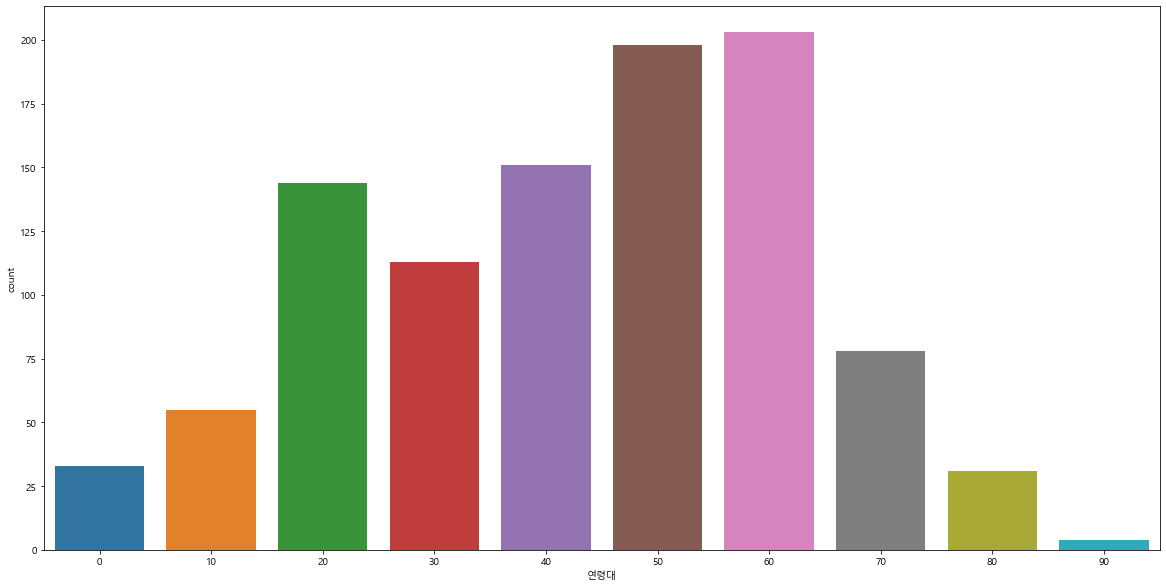

In [293]:
start_date = '2020. 8. 16'
end_date = '2020. 9. 03'
temp1 = covid_df['증상발현일']<=end_date
temp2 = covid_df['증상발현일']>=start_date
date_ranges = covid_df[temp1&temp2]
draw_covid_df_countplot('연령대',date_ranges)

#  키워드 네이버 뉴스 코로나 후유증 검색 뉴스수

> 2월 805
>
> 3월 1372
>
> 4월 1090
>
> 5월 774
>
> 6월 746
>
> 7월 760
>
> 8월 1212
>
> 9월 23일까지 1322

In [294]:
naver_news_month = pd.DataFrame([{"month":"2" ,"counts":805},
                                  {"month":"3" ,"counts":1372},
                                  {"month":"4" ,"counts":1090},
                                  {"month":"5" ,"counts":774},
                                  {"month":"6" ,"counts":746},
                                  {"month":"7" ,"counts":760},
                                  {"month":"8" ,"counts":1212},
                                  {"month":"9" ,"counts":1322}
                                 ])

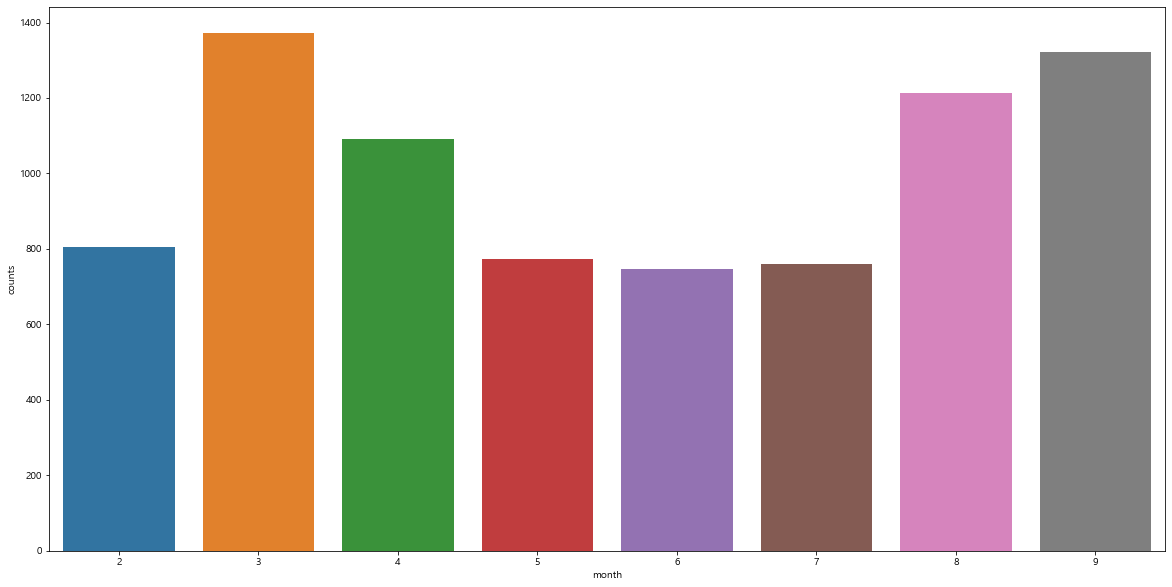

In [295]:
plt.figure(figsize=(20,10))
sns.barplot(x="month", y="counts", data=naver_news_month)

#  인스타그램
- 9월: 22일까지의 데이터

In [296]:
insta = pd.read_csv('./files/3_1_crawling_raw.csv',encoding = 'utf-8')
insta['month'] = 0
insta['date'] = insta['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
insta['month'] = insta['date'].apply(lambda x: x.month)

insta.head()


,index_col,content,date,like,place,tags,month
0,761,#캘리그라피연습#캘리초보자#캘리입문#나는가장이니까#다이소종이액자#방콕취미생활#코로나후유증,2020-02-11,17,NaN,"['#캘리그라피연습', '#캘리초보자', '#캘리입문', '#나는가장이니까', '#다이소종이액자', '#방콕취미생활', '#코로나후유증']",2
1,760,#아기동영상 옷만 입어도 좋다는데..우리만 집에 있나봐 시은아..😭영상찍다 보니 시으니보다 내가 더 이상해진것 같기도 하고 ㅋㅋㅋㅋㅋㅋ#코로나후유증 😭😭오늘 시니 본 이모탐툔들 그냥 한번 웃고 가세요^^;-사진 끝까지 봐야 엄마 최애가 나와요💙#주먹꽉 #불주먹 하루빨리 깨끗한 공기 마시며뛰어놀수 있는 날이 되길🌸내강아지랑 손잡고 꽃구경도 다니고 예쁜추억 만들수있게 해주세요🙏🏻,2020-02-12,69,NaN,"['#아기동영상', '#코로나후유증', '#주먹꽉', '#불주먹']",2
2,759,꼬마요정의 창밖의공기갈망코로나의 후유증#코로나후유증#꼬마요정#그리운밖에세상#,2020-02-14,4,NaN,"['#코로나후유증', '#꼬마요정', '#그리운밖에세상']",2
3,758,오랜만의 여유#코로나후유증#외출이필요해,2020-02-18,40,스타벅스 안양역r점,"['#코로나후유증', '#외출이필요해']",2
4,755,#코로나후유증 #낮술 #수라매생이칼국수 위로주 한자누건네며...😭#예쁜그릇창고 #대구그릇 #그릇,2020-02-21,43,NaN,"['#코로나후유증', '#낮술', '#수라매생이칼국수', '#예쁜그릇창고', '#대구그릇', '#그릇']",2


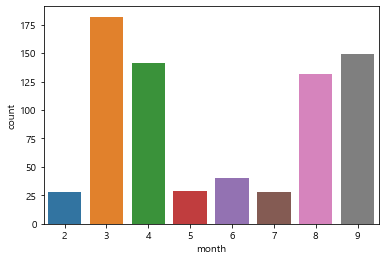

In [297]:
sns.countplot(x='month', data=insta)

# 기타 SNS
- 트위터
- 페이스북		
- 카카오페이지	
- 브런치


In [298]:
sns_custom_dates = sorted(list(set(sns_custom['date'])))

### 전처리

In [299]:
sns_custom = pd.read_csv('./files/sns_custom.csv',encoding = 'utf-8', index_col="index")
sns_list = []
for sns_custom_date in sns_custom_dates:
    temp = {}
    temp['date'] = sns_custom_date
    temp['writing'] = 0
    for j,sns_c in enumerate(sns_custom['date']):
        if(temp['date'] == sns_c):
            temp_writing = temp['writing']
            temp['writing'] = temp_writing + sns_custom.iloc[j,1]
    sns_list.append(temp)
sns_list = pd.DataFrame(sns_list)
sns_list['date'] = sns_list['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
sns_list['month'] = sns_list['date'].apply(lambda x: x.month)

### 월별

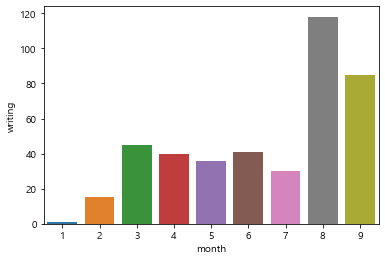

In [300]:
sns_month = []
for month in range(1,10):
    temp = {}
    temp['month'] = month
    temp['writing'] = 0
    for j,sns_c in enumerate(sns_list['month']):
        if(temp['month'] == sns_c):
            temp_writing = temp['writing']
            temp['writing'] = temp_writing + sns_list.iloc[j,1]
    sns_month.append(temp)
sns_month = pd.DataFrame(sns_month)
sns.barplot(x='month',y='writing', data=sns_month)

# 연령별 월별 확진자 수

In [301]:
covid_df['확진일자'] = covid_df['확진일자'].apply(lambda x: datetime.strptime(x.replace(".","").replace(" ","-"), '%Y-%m-%d'))

In [302]:
covid_df['확진월'] = 0
covid_df['확진월'] = covid_df['확진일자'].apply(lambda x: x.month)


In [303]:
total_month = list(set(covid_df['확진월']))
total_age = list(set(covid_df['연령대']))
total_arr = []
for month in total_month:
    for age in total_age:
        temp_dict = {}
        affected=0
        cond1 = covid_df['확진월'] == month
        cond2 = covid_df['연령대'] == age
        affected = len(covid_df[cond1 & cond2])
        temp_dict['month']=month
        temp_dict['age']=age
        temp_dict['affected']=affected
        total_arr.append(temp_dict)
total_df = pd.DataFrame(total_arr)


### plot

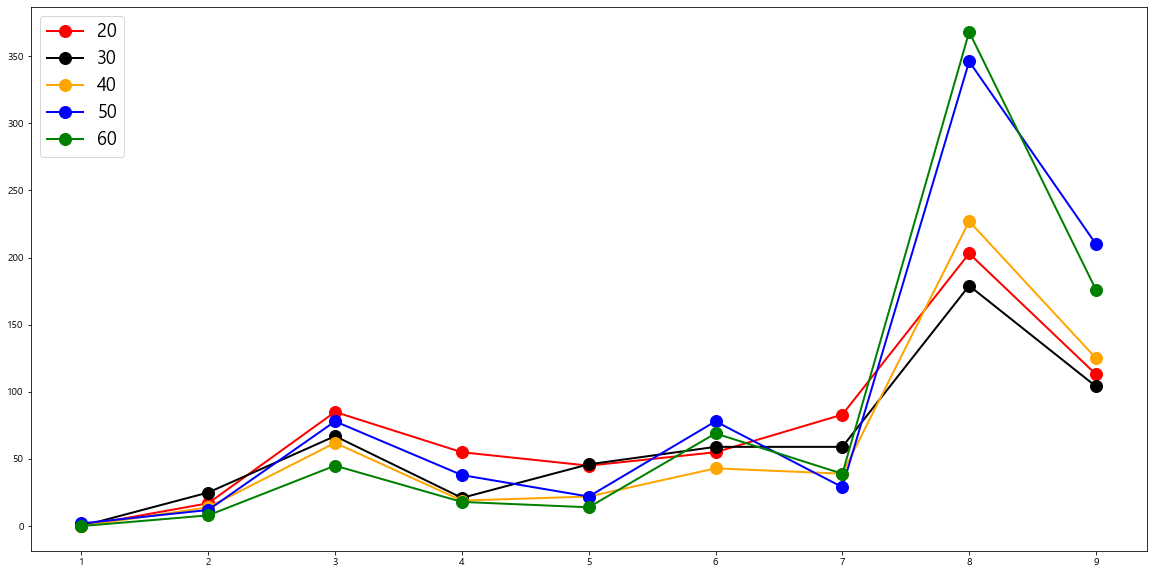

In [304]:
plt.figure(figsize=(20,10))
plt.plot( 'month','affected' ,data=total_df[total_df['age']==20], marker='o', markerfacecolor='red', markersize=12, color='red', linewidth=2)
plt.plot( 'month','affected' ,data=total_df[total_df['age']==30], marker='o', markerfacecolor='black', markersize=12, color='black', linewidth=2)
plt.plot( 'month','affected' ,data=total_df[total_df['age']==40], marker='o', markerfacecolor='orange', markersize=12, color='orange', linewidth=2)
plt.plot( 'month','affected' ,data=total_df[total_df['age']==50], marker='o', markerfacecolor='blue', markersize=12, color='blue', linewidth=2)
plt.plot( 'month','affected' ,data=total_df[total_df['age']==60], marker='o', markerfacecolor='green', markersize=12, color='green', linewidth=2)
plt.legend(loc='upper left',labels=('20','30','40','50','60'), fontsize=18)

### PIE - 8월

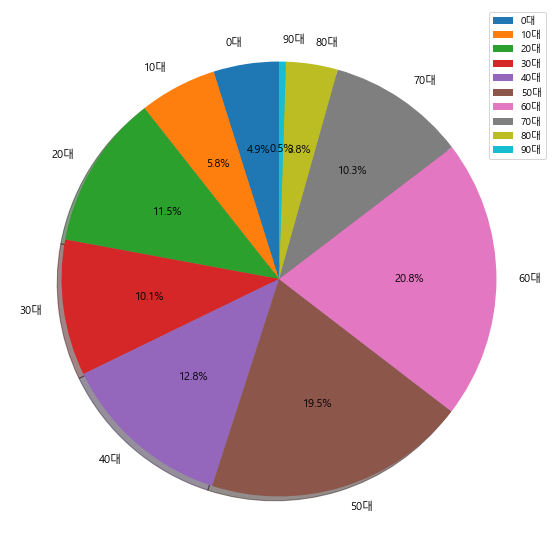

In [305]:
total_df = total_df.sort_values(by=['age'])
custom_total_age_list = ['0대','10대','20대','30대','40대','50대','60대','70대','80대','90대',]

month = 8
plt.figure(figsize=(20,10))
plt.pie(total_df[total_df['month']==month]['affected'], textprops={'fontsize': 11}, 
        labels=custom_total_age_list, shadow=True, autopct='%0.1f%%',startangle=90)
plt.legend(custom_total_age_list,fontsize=10,loc='upper right')
plt.show()

# 경기도 전체 연령별 인구 수 
http://stat.daegu.go.kr/basicStats/moisPrsnInfo.do

- 9월의 인구수 데이터 집계 전

In [306]:
total_korea_people = {  '1':pd.read_csv('files/전체인원1월.csv',encoding = 'euc-kr'),
                        '2':pd.read_csv('files/전체인원2월.csv',encoding = 'euc-kr'),
                        '3':pd.read_csv('files/전체인원3월.csv',encoding = 'euc-kr'),
                        '4':pd.read_csv('files/전체인원4월.csv',encoding = 'euc-kr'),
                        '5':pd.read_csv('files/전체인원5월.csv',encoding = 'euc-kr'),
                        '6':pd.read_csv('files/전체인원6월.csv',encoding = 'euc-kr'),
                        '7':pd.read_csv('files/전체인원7월.csv',encoding = 'euc-kr'),
                        '8':pd.read_csv('files/전체인원8월.csv',encoding = 'euc-kr'),
                        '9':pd.read_csv('files/전체인원8월.csv',encoding = 'euc-kr')
                     }

In [307]:
for month,total_korea_month in total_korea_people.items():
    total_korea_month['행정구역'] = ['전국','서울특별시','부산광역시','대구광역시','인천광역시','광주광역시',
                                  '대전광역시','울산광역시','세종특별자치시','경기도','강원도'  ,'충청북도',
                                  '충청남도' ,'전라북도' ,'전라남도' ,'경상북도' ,'경상남도' ,'제주특별자치도']
    if (month=='9'):
        month = 8
    del total_korea_month[f'2020년0{month}월_계_총인구수']
    del total_korea_month[f'2020년0{month}월_계_연령구간인구수']
    del total_korea_month[f'2020년0{month}월_계_0~9세']
    del total_korea_month[f'2020년0{month}월_계_10~19세']
    del total_korea_month[f'2020년0{month}월_계_20~29세']
    del total_korea_month[f'2020년0{month}월_계_30~39세']
    del total_korea_month[f'2020년0{month}월_계_40~49세']
    del total_korea_month[f'2020년0{month}월_계_50~59세']
    del total_korea_month[f'2020년0{month}월_계_60~69세']
    del total_korea_month[f'2020년0{month}월_계_70~79세']
    del total_korea_month[f'2020년0{month}월_계_80~89세']
    del total_korea_month[f'2020년0{month}월_계_90~99세']
    del total_korea_month[f'2020년0{month}월_계_100세 이상']
    del total_korea_month[f'2020년0{month}월_남_총인구수']
    del total_korea_month[f'2020년0{month}월_남_연령구간인구수']
    del total_korea_month[f'2020년0{month}월_여_연령구간인구수']
    del total_korea_month[f'2020년0{month}월_여_총인구수']
    total_korea_month.columns = ['행정구역','남_0대','남_10대','남_20대','남_30대','남_40대','남_50대','남_60대',
                              '남_70대','남_80대','남_90대','남_100대','여_0대','여_10대','여_20대','여_30대',
                              '여_40대','여_50대','여_60대','여_70대','여_80대','여_90대','여_100대'
                             ]

In [308]:
for month,total_korea_month in total_korea_people.items():
    if (month=='9'):
        month = 8
    for col in list(total_korea_month.columns):
        total_korea_month[col] = total_korea_month[col].str.replace(',','')
        if(col != '행정구역'):
            total_korea_month[col] = total_korea_month[col].apply(pd.to_numeric)

In [309]:
for month,total_korea_month in total_korea_people.items():
    if (month=='9'):
        month = 8
    for col in list(total_korea_month.columns):
        total_korea_month['남_80대이상'] = total_korea_month['남_80대'] + total_korea_month['남_90대'] + total_korea_month['남_100대']
        total_korea_month['여_80대이상'] = total_korea_month['여_80대'] + total_korea_month['여_90대'] + total_korea_month['여_100대']
    del total_korea_month['남_90대']
    del total_korea_month['남_100대']
    del total_korea_month['여_90대']
    del total_korea_month['여_100대']

### 월별 인원수 체크

In [310]:
month = '1'
total_korea_people[month][total_korea_people[month]['행정구역']=='경기도']

,행정구역,남_0대,남_10대,남_20대,남_30대,남_40대,남_50대,남_60대,남_70대,남_80대,여_0대,여_10대,여_20대,여_30대,여_40대,여_50대,여_60대,여_70대,여_80대,남_80대이상,여_80대이상
9,경기도,604946,696108,931584,986198,1165205,1116749,700122,334417,117354,575537,655664,840261,933887,1128903,1084911,710062,405992,210268,129981,249841


# 연령대별 감염자 비율

In [313]:
gyeonggido_total_people = total_korea_people["9"][total_korea_people["9"]['행정구역']=='경기도']

In [314]:
gyeonggido_total_people.columns

Index(['행정구역', '남_0대', '남_10대', '남_20대', '남_30대', '남_40대', '남_50대', '남_60대',
       '남_70대', '남_80대', '여_0대', '여_10대', '여_20대', '여_30대', '여_40대', '여_50대',
       '여_60대', '여_70대', '여_80대', '남_80대이상', '여_80대이상'],
      dtype='object')

In [315]:
gyeonggido_0_age = gyeonggido_total_people['남_0대'] + gyeonggido_total_people['여_0대']
gyeonggido_10_age = gyeonggido_total_people['남_10대'] + gyeonggido_total_people['여_10대']
gyeonggido_20_age = gyeonggido_total_people['남_20대'] + gyeonggido_total_people['여_20대']
gyeonggido_30_age = gyeonggido_total_people['남_30대'] + gyeonggido_total_people['여_30대']
gyeonggido_40_age = gyeonggido_total_people['남_40대'] + gyeonggido_total_people['여_40대']
gyeonggido_50_age = gyeonggido_total_people['남_50대'] + gyeonggido_total_people['여_50대']
gyeonggido_60_age = gyeonggido_total_people['남_60대'] + gyeonggido_total_people['여_60대']
gyeonggido_70_age = gyeonggido_total_people['남_70대'] + gyeonggido_total_people['여_70대']
gyeonggido_80_age = gyeonggido_total_people['남_80대'] + gyeonggido_total_people['여_80대']
gyeonggido_90_age = gyeonggido_total_people['남_80대이상'] + gyeonggido_total_people['여_80대이상']

gyeonggido_people = pd.DataFrame([{"age":0,"total_people":gyeonggido_0_age[9],'infected':(covid_df['연령대']==0).sum()},
                                  {"age":10,"total_people":gyeonggido_10_age[9],'infected':(covid_df['연령대']==10).sum()},
                                  {"age":20,"total_people":gyeonggido_20_age[9],'infected':(covid_df['연령대']==20).sum()},
                                  {"age":30,"total_people":gyeonggido_30_age[9],'infected':(covid_df['연령대']==30).sum()},
                                  {"age":40,"total_people":gyeonggido_40_age[9],'infected':(covid_df['연령대']==40).sum()},
                                  {"age":50,"total_people":gyeonggido_50_age[9],'infected':(covid_df['연령대']==50).sum()},
                                  {"age":60,"total_people":gyeonggido_60_age[9],'infected':(covid_df['연령대']==60).sum()},
                                  {"age":70,"total_people":gyeonggido_70_age[9],'infected':(covid_df['연령대']==70).sum()},
                                  {"age":80,"total_people":gyeonggido_80_age[9],'infected':(covid_df['연령대']==80).sum()},
                                  {"age":90,"total_people":gyeonggido_90_age[9],'infected':(covid_df['연령대']==90).sum()},
                                 ]) 

In [316]:
gyeonggido_people['infected_rate'] = gyeonggido_people['infected'] / gyeonggido_people['total_people'] *100
gyeonggido_people

,age,total_people,infected,infected_rate
0,0,1161588,170,0.014635
1,10,1338833,223,0.016656
2,20,1795440,656,0.036537
3,30,1912042,560,0.029288
4,40,2297528,551,0.023982
5,50,2223814,815,0.036649
6,60,1486778,737,0.049570
7,70,759138,368,0.048476
8,80,340520,163,0.047868
9,90,395553,28,0.007079


# 기준일 관계없이 경기도 전체 인구 기준

### 연령별 인구수

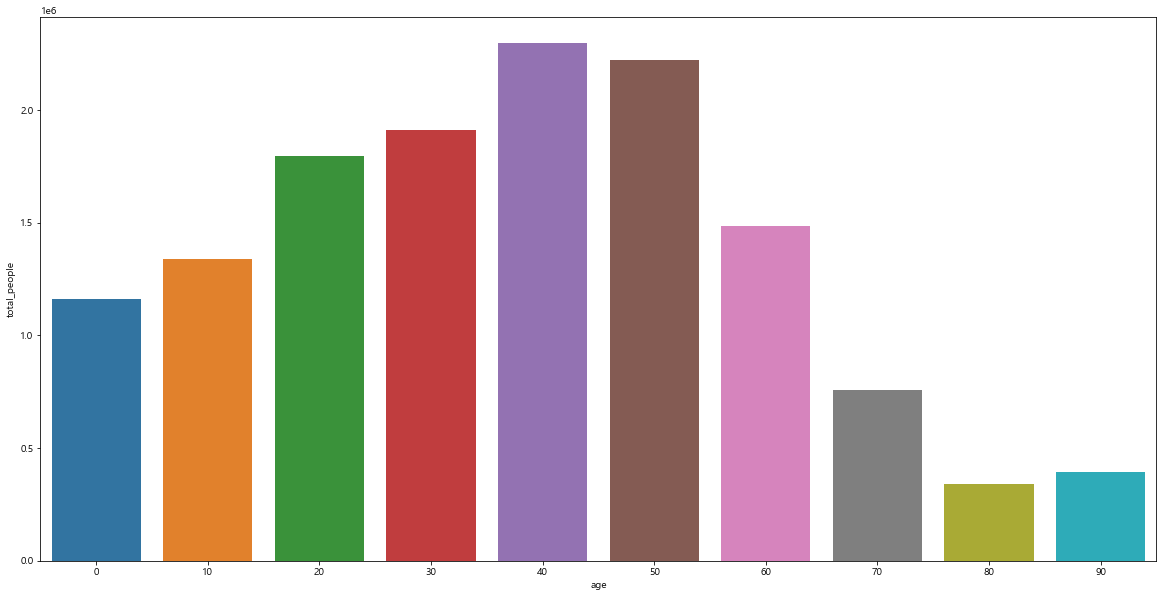

In [317]:
plt.figure(figsize=(20,10))
sns.barplot(x="age", y="total_people", data=gyeonggido_people)

### 연령별 감염자 수

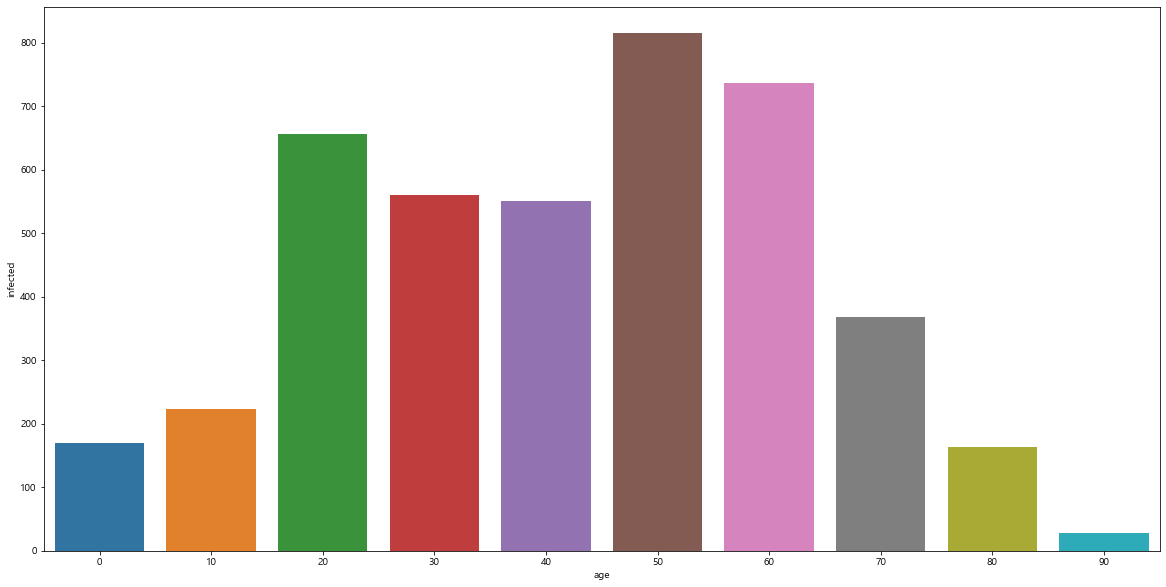

In [318]:
plt.figure(figsize=(20,10))
sns.barplot(x="age", y="infected", data=gyeonggido_people)

### 연령별 감염률

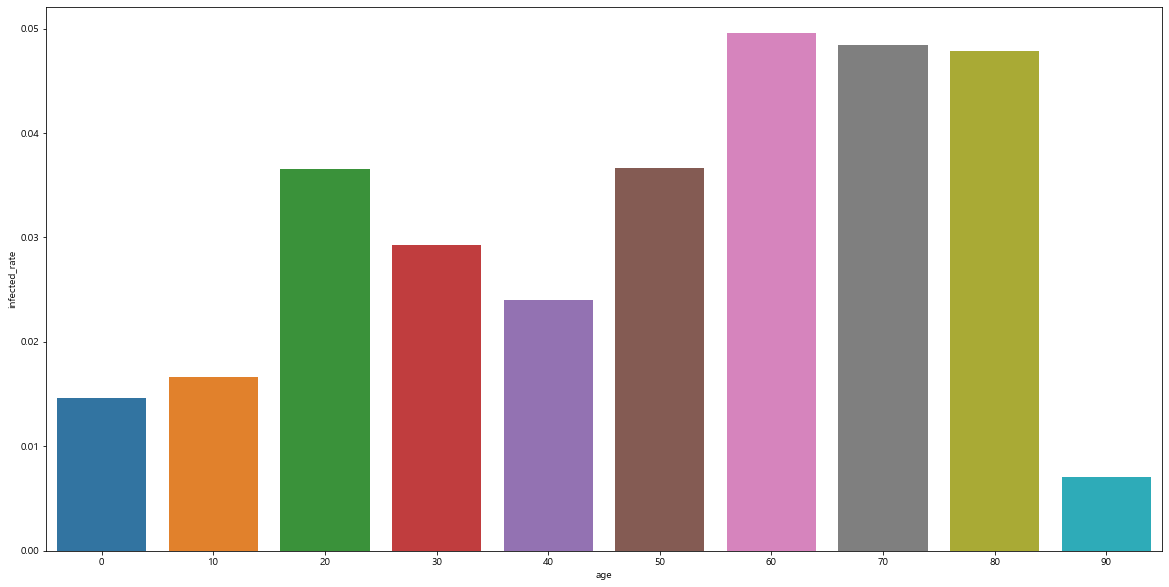

In [319]:
plt.figure(figsize=(20,10))
sns.barplot(x="age", y="infected_rate", data=gyeonggido_people)